In [14]:
# Read in necessary packages.

import cv2
import matplotlib.pyplot as plt

import puzzle_recognition.puzzle_recognizer
import sudoku_solver.sudoku_solver
import sudoku_solver.representing_sudoku
from puzzle_recognition.puzzle_recognizer import recognize_sudoku
from sudoku_solver.sudoku_solver import ComputeAllSolutions
from sudoku_solver.representing_sudoku import printSudoku

import importlib
importlib.reload(puzzle_recognition.puzzle_recognizer)
importlib.reload(sudoku_solver.sudoku_solver)
importlib.reload(sudoku_solver.representing_sudoku)

<module 'sudoku_solver.representing_sudoku' from '/Users/sisuter/Documents/Projects/Sudoku_Detector_and_Solver/sudoku_solver/representing_sudoku.py'>

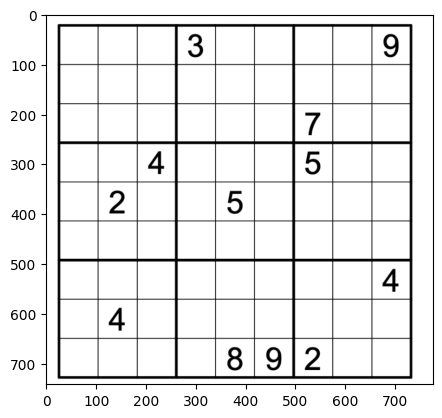

In [15]:
# Read an image of a Sudoku
image_folder = 'images/'
image_path = image_folder + 'example_images/sudoku4.png' # For the example images, choose 'example_images/sudokux.png' for x = 1,2,3 or 4.
image = cv2.imread(image_path)

# Show the image
plt.imshow(image)

In [16]:
# Recognize the Sudoku from the image and obtain a 9x9 array.
weights_path = 'puzzle_recognition/model_training/digit_recognizer.h5' #Path for weights of the CNN for digit recognition
sudoku = recognize_sudoku(image, weights_path)

# Show the read Sudoku
print(sudoku)

[[0. 0. 0. 3. 0. 0. 0. 0. 9.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 4. 0. 0. 0. 5. 0. 0.]
 [0. 2. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 8. 9. 2. 0. 0.]]


In [17]:
# Sometimes it may happen that a number did not get read correctly (depending on many factors). Here one can correct wrong numbers:
#sudoku[3][5] = 7 #uncomment to make changes
#sudoku[0][8] = 0 #uncomment to make changes

In [18]:
# Compute all valid solutions to the Sudoku
max_sols_computing = 10 #There can be a huge amount of solutions if the puzzle has few filled numbers. This variable provides a cap as to how many distinct solutions will be computed.
n_sols, sols = ComputeAllSolutions(sudoku, max_sols_computing)

In [19]:
# Print all distinct solutions to the Sudoku.

if n_sols == 0:
    print("The Sudoku is unsolvable. It has no valid solution.")
elif n_sols == 1:
    print("The Sudoku is a true Sudoku: it has exactly one solution. Namely:")
elif n_sols < max_sols_computing:
    print("The Sudoku has", n_sols, "distinct solutions. They are:")
else:
    print("The Sudoku has at least", n_sols, "distinct solutions. They are:")
    
for sol in sols:
    printSudoku(sol)

The Sudoku has at least 10 distinct solutions. They are:
╔═══╤═══╤═══╦═══╤═══╤═══╦═══╤═══╤═══╗
║ 8 │ 7 │ 2 ║ 3 │ 1 │ 5 ║ 6 │ 4 │ 9 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 4 │ 3 │ 6 ║ 2 │ 9 │ 7 ║ 1 │ 5 │ 8 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 1 │ 5 │ 9 ║ 8 │ 4 │ 6 ║ 7 │ 2 │ 3 ║
╠═══╪═══╪═══╬═══╪═══╪═══╬═══╪═══╪═══╣
║ 6 │ 1 │ 4 ║ 9 │ 3 │ 2 ║ 5 │ 8 │ 7 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 3 │ 2 │ 7 ║ 1 │ 5 │ 8 ║ 4 │ 9 │ 6 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 5 │ 9 │ 8 ║ 6 │ 7 │ 4 ║ 3 │ 1 │ 2 ║
╠═══╪═══╪═══╬═══╪═══╪═══╬═══╪═══╪═══╣
║ 2 │ 8 │ 1 ║ 5 │ 6 │ 3 ║ 9 │ 7 │ 4 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 9 │ 4 │ 3 ║ 7 │ 2 │ 1 ║ 8 │ 6 │ 5 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 7 │ 6 │ 5 ║ 4 │ 8 │ 9 ║ 2 │ 3 │ 1 ║
╚═══╧═══╧═══╩═══╧═══╧═══╩═══╧═══╧═══╝

╔═══╤═══╤═══╦═══╤═══╤═══╦═══╤═══╤═══╗
║ 8 │ 7 │ 6 ║ 3 │ 4 │ 5 ║ 1 │ 2 │ 9 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 4 │ 3 │ 9 ║ 2 │ 1 │ 7 ║ 6 │ 5 │ 8 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 1 │ 5 │ 2 ║ 8 │ 9 │ 6 ║ 7 │ 